# Exploratory Data Analysis: US Transportation
## Authors: Yasmine Thandi, Kyle Truong, Bin Xu
**Original Dataset Source: Monthly Transportation Statistics (Updated 2024). Kaggle Data Science Platform. https://www.kaggle.com/datasets/utkarshx27/monthly-transportation-statistics/data**

**Modified Dataset: https://raw.githubusercontent.com/HenryCROSS/eecs3401_final_project/main/data/Monthly_Transportation_Statistics.csv**

## Transportation Dataset Description
From the original dataset, any data prior to 1967 was removed, due to there being an insufficient amount of data recorded by The Bureau of Transportation Statistics.

We believe that most of the data provided to us is excessive and isn't required for the task we want to focus on. Therefore we reduced our 136 unique attributes to 26 that we thought were useful for our model.
### Attributes Used:
1. **Date** - The date the data was recorded (Typically the first day of each month at 12:00AM)
1. **Transit Ridership - Other Transit Modes - Adjusted** - Total number of riders on other transit modes.
1. **Transit Ridership - Fixed Route Bus - Adjusted** - Total number of riders on any bus routes.
1. **Transit Ridership - Urban Rail - Adjusted** - Total number of riders on any methods of urban rail (i.e. Subway, Local Trains, etc.)
1. **Freight Rail Intermodal Units** - Number of freight cars used per month.
1. **Freight Rail Carloads** - Number of freight cars with cargo loaded per month.
1. **Highway Vehicle Miles Traveled - All Systems** - Total combined miles travelled on a highway.
1. **Highway Fuel Price - Regular Gasoline** - Price of regular gasoline per gallon.
1. **Highway Fuel Price - On-highway Diesel** - Price of diesel per gallon.
1. **Personal Spending on Transportation - Transportation Services - Seasonally Adjusted** - Average monthly cost on transportation.
1. **Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted** - Average monthly on gasoline, diesel or electricity.
1. **Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted** - Average monthly spending on autoshops, repair parts and services.
1. **Passenger Rail Passengers** - Number of passengers who use the trains every month
1. **Transportation Services Index - Freight** - Month to month performance output measure of freight services
1. **Transportation Services Index - Passenger** - Month to month performance output measure of passenger services
1. **Real Gross Domestic Product - Seasonally Adjusted** - Monetary value of all transportation services
1. **U.S.-Canada Incoming Person Crossings** - Number of people entering the United States from Canada
1. **U.S.-Canada Incoming Truck Crossings** - Number of trucks entering the United States from Canada
1. **U.S.-Mexico Incoming Person Crossings** - Number of people entering the United States from Mexico
1. **U.S.-Mexico Incoming Truck Crossings** - Number of trucks entering the United States from Mexico
1. **U.S. Airline Traffic - Domestic - Non Seasonally Adjusted** - Amount of airline traffic travelling within the United States
1. **U.S. Airline Traffic - Total - Non Seasonally Adjusted** - Amount of airline traffic travelling collectively involving the United States
1. **U.S. Airline Traffic - International - Non Seasonally Adjusted** - Amount of airline traffic travelling in and out of the United States
1. **Transborder - Total North American Freight** - Total freight travelled across North America
1. **Transborder - U.S. - Mexico Freight** - Total freight travelled across the US-Mexico border into the United States
1. **Transborder - U.S. - Canada Freight** - Total freight travelled across the US-Canada border into the United States





# 1- Look at the big picture

### Frame the problem
1. Supervised learning.
2. A regression task – predict a value.
3. Batch learning 
    - Small data set
    - No need to continuously adjust any incoming data because the last data recorded was in December, 2023

### Look at the big picture
Predictions will be used to inform operators in the US about future transportation metrics by using previous data on border crossings, ridership count, freight values, prices and revenue. We will be predicting the future cost of transportation and the future size of ridership. This will help with resource allocation, and predicting the future demand of transportation services for the operators. By understanding the relationship between the demand and revenue in the data set, we will provide a suitable budget as a future reference to operators to assist with optimizing pricing strategies for transportation services. 

In [1]:
# Import libraries
# you can install missing library using pip install numpy 

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the data

In [2]:
url = "https://raw.githubusercontent.com/HenryCROSS/eecs3401_final_project/main/data/Monthly_Transportation_Statistics.csv"
data = pd.read_csv(url, sep=',')
data_bak = data

In [3]:
data

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,08/01/2023 12:00:00 AM,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,544000.0,NaN,12196000.0,NaN,3099000.0,NaN,NaN,NaN,0.8,NaN
920,920,09/01/2023 12:00:00 AM,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,501000.0,NaN,12438000.0,NaN,3220000.0,NaN,NaN,NaN,0.8,NaN
921,921,10/01/2023 12:00:00 AM,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,451000.0,NaN,12408000.0,NaN,3038000.0,NaN,NaN,NaN,NaN,NaN
922,922,11/01/2023 12:00:00 AM,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,478000.0,NaN,12329000.0,NaN,2991000.0,NaN,NaN,NaN,NaN,NaN


## Task 2.1
We decided at this point in time to reduce the number of attributes in our dataset, as we believe it would help optimize our workflow moving forwards. As mentioned above, these points of data were selected because we believe that they would be useful to our algorithm.

In [4]:
tokeep = ["Date", "Transit Ridership - Other Transit Modes - Adjusted", "Transit Ridership - Fixed Route Bus - Adjusted", "Transit Ridership - Urban Rail - Adjusted", "Freight Rail Intermodal Units", "Freight Rail Carloads", "Highway Vehicle Miles Traveled - All Systems", "Highway Fuel Price - Regular Gasoline", 
          "Highway Fuel Price - On-highway Diesel", "Personal Spending on Transportation - Transportation Services - Seasonally Adjusted", "Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted", "Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted",
          "Passenger Rail Passengers", "Transportation Services Index - Freight", "Transportation Services Index - Passenger", "Real Gross Domestic Product - Seasonally Adjusted", "U.S.-Canada Incoming Person Crossings", "U.S.-Canada Incoming Truck Crossings", "U.S.-Mexico Incoming Person Crossings", 
          "U.S.-Mexico Incoming Truck Crossings", "U.S. Airline Traffic - Domestic - Non Seasonally Adjusted", "U.S. Airline Traffic - Total - Non Seasonally Adjusted", "U.S. Airline Traffic - International - Non Seasonally Adjusted", "Transborder - Total North American Freight", "Transborder - U.S. - Mexico Freight","Transborder - U.S. - Canada Freight"]
data = data[tokeep]
# data.dropna(axis=0, inplace=True)

In [5]:
data.head(20)

,Date,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,Freight Rail Intermodal Units,Freight Rail Carloads,Highway Vehicle Miles Traveled - All Systems,Highway Fuel Price - Regular Gasoline,Highway Fuel Price - On-highway Diesel,Personal Spending on Transportation - Transportation Services - Seasonally Adjusted,...,U.S.-Canada Incoming Person Crossings,U.S.-Canada Incoming Truck Crossings,U.S.-Mexico Incoming Person Crossings,U.S.-Mexico Incoming Truck Crossings,U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,U.S. Airline Traffic - Total - Non Seasonally Adjusted,U.S. Airline Traffic - International - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,Transborder - U.S. - Canada Freight
0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,07/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,08/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,09/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, we implement the info() function to get a description of our data, and the number of non-null attributes. There are no missing values. However, we have decided to remove the.... attributes because....

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 26 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Date                                                                                         924 non-null    object 
 1   Transit Ridership - Other Transit Modes - Adjusted                                           252 non-null    float64
 2   Transit Ridership - Fixed Route Bus - Adjusted                                               252 non-null    float64
 3   Transit Ridership - Urban Rail - Adjusted                                                    252 non-null    float64
 4   Freight Rail Intermodal Units                                                                418 non-null    float64
 5   Freight Rail Carloads               

**Missing values:**
- Highway...

# 3. Explore and visualize the data to gain insights.

We have decided to create custom heading titles to make the following graphs in our data visualization more readable. Here is the key to the following acronymS of the attribute names:

- TR = Transit Ridership, FR = Freight Rail, H = Highway, V = Vehicle, F = Fuel, P = Price, PST = Personal Spending on Transportation, TSI = Transportation Sevices Index, Pass = Passenger, PC = Person Crossings, TC = Truck Crossings, Mex = Mexico, AT = Airline Traffic, TB = Transborder
- AS = All Systems, A = Adjusted, SA = Seasonally Adjusted, NSA = Non Seasonally Adjusted

In [7]:
# Custom headers
custom_headers = [
    "Date",
    "TROtherTransit(A)",
    "TRFixedRouteBus(A)",
    "TRUrbanRail(A)",
    "FRIntermodalUnits",
    "FRCarloads",
    "HVMiles(AS)",
    "HFP-RegGas",
    "HFP-HDiesel",
    "PST-TransServ(SA)",
    "PST-EnergyGoods(SA)",
    "PST-AutoServ(SA)",
    "PassRailPass",
    "TSI-Freight",
    "TSI-Pass",
    "RealGDP(SA)",
    "US-CA PC",
    "US-CA TC",
    "US-Mex PC",
    "US-Mex TC",
    "US AT - Domestic(NSA)",
    "US AT - Total(NSA)",
    "US AT - International(NSA)",
    "TB - TotalFreight",
    "TB - US-MexFreight",
    "TB - US-CAFreight"
]

# Load the dataset with custom headers and selected columns
data = pd.read_csv(url, usecols=tokeep)
data.columns = custom_headers


## 3.1 Plot a histogram of the data using hist()

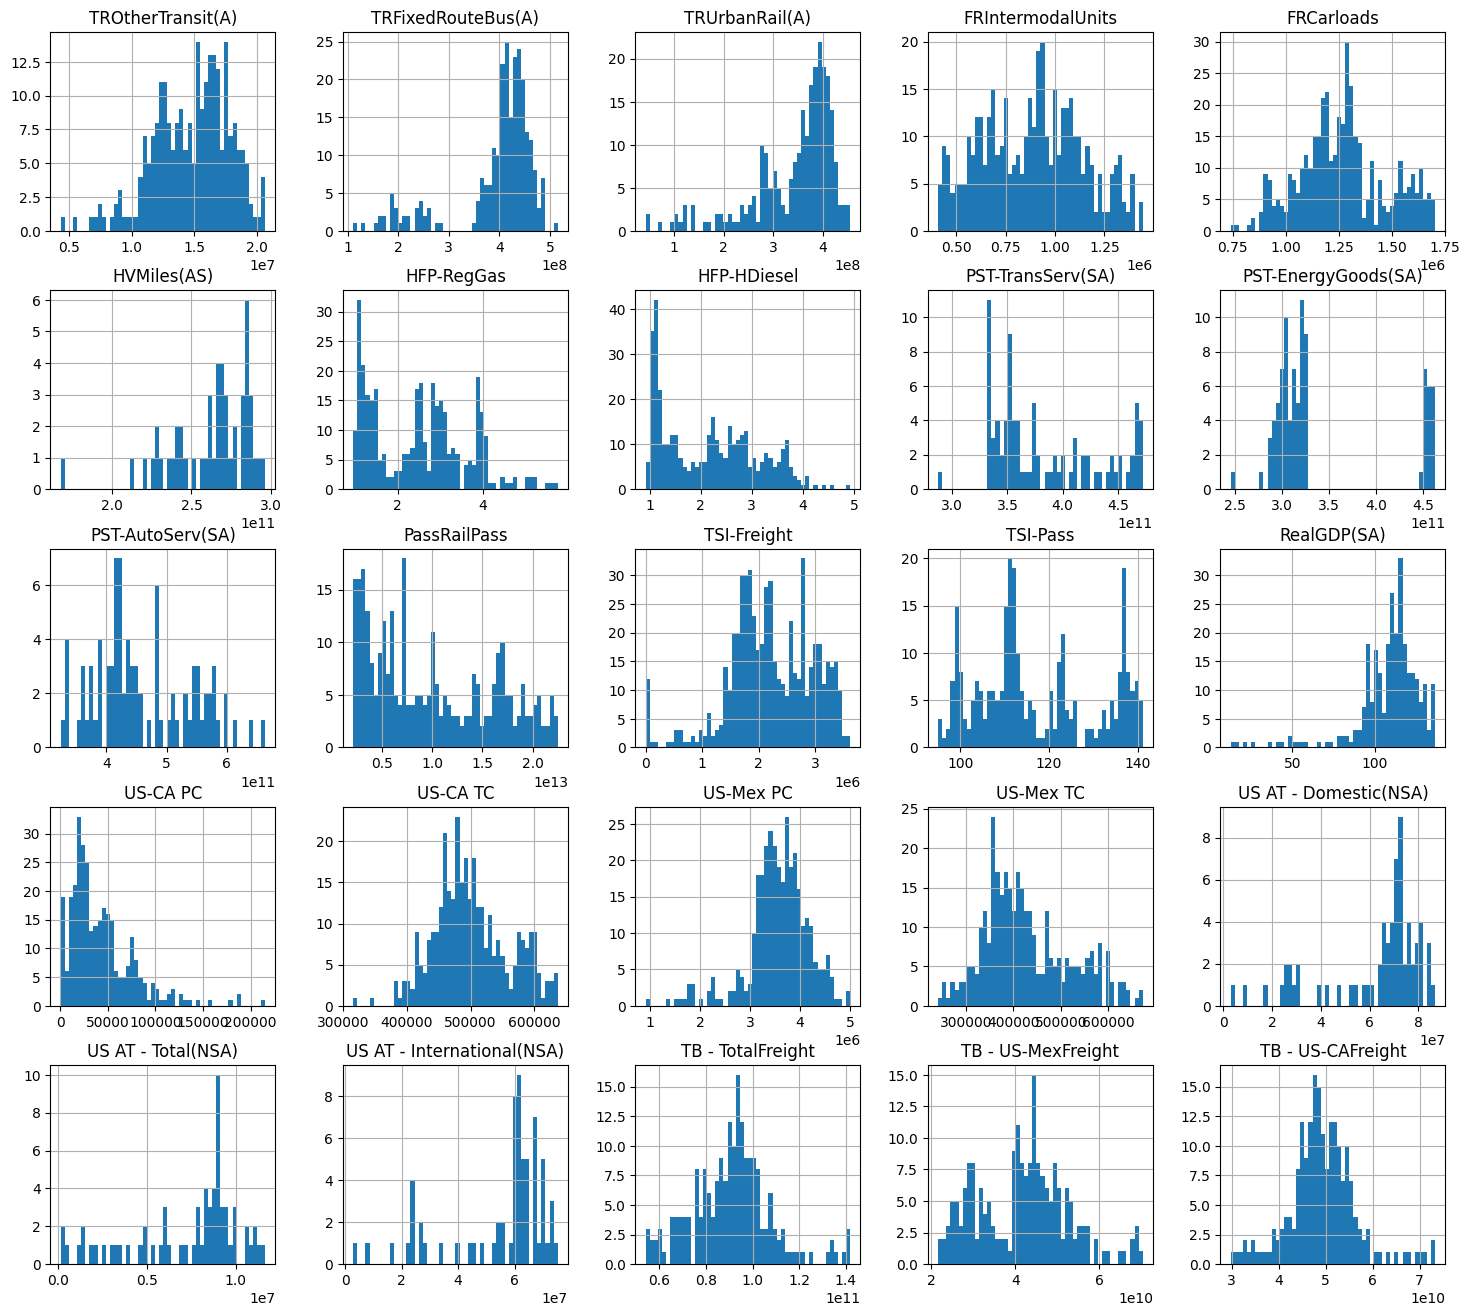

In [8]:
data.hist(bins=50, figsize=(18, 16))

plt.show()

## 3.1b Plot a Box Plot of the data using boxplot() of Highway Fuel Prices

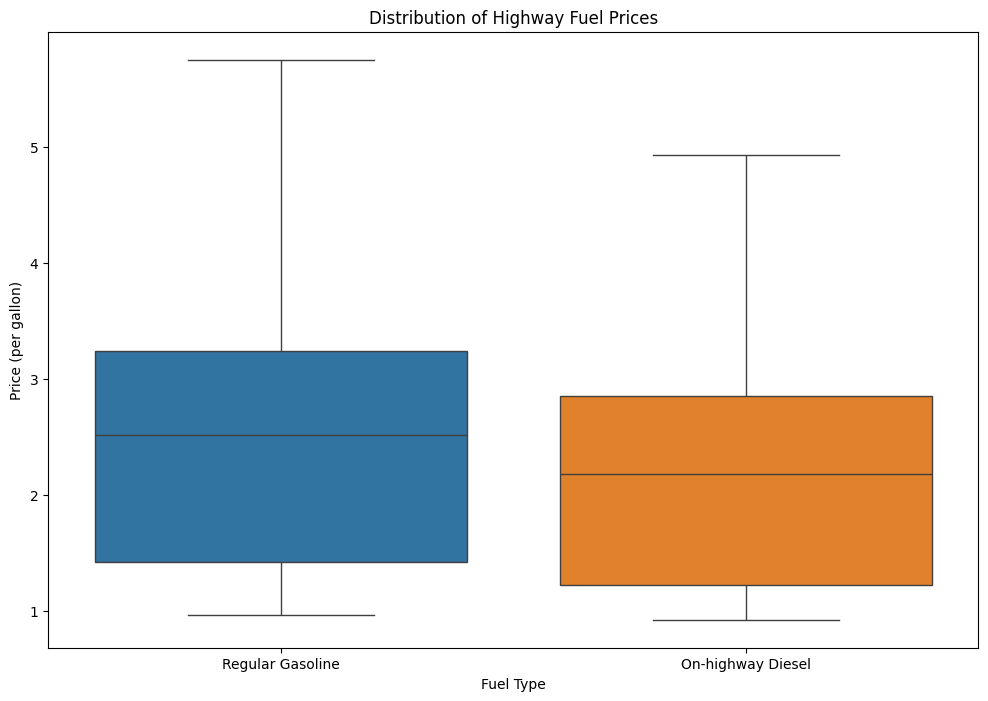

In [9]:
# Boxplot of Highway Fuel Prices : Compares the distribution of regular gasoline against highway diesel prices so that operators can make informed decisions regarding budgeting and pricing on transportation services after examining the interquartile range (the spread of the prices)
# The line inside each box is the median price per fuel type, which in this case is 2.5 per gallon for regular gasoline, and about 2.3 per gallon for onhighway diesel
# There are no apparent outliers
# Here, the regular gasoline prices are higher since its box is higher on the graph
# The spread of the prices b/n the first and third quartile seem about the same, with quartile 2 being on the heavier side, so the data is slightly negatively skewed (lower prices more common)
plt.figure(figsize=(12, 8))  
sns.boxplot(data=data[['HFP-RegGas', 'HFP-HDiesel']])
plt.title('Distribution of Highway Fuel Prices')
plt.ylabel('Price (per gallon)')
plt.xlabel('Fuel Type')
plt.xticks(ticks=[0, 1], labels=['Regular Gasoline', 'On-highway Diesel'])

plt.show()

## 3.1c Plot a histogram of the data using hist() of Personal Spendings on Transportation

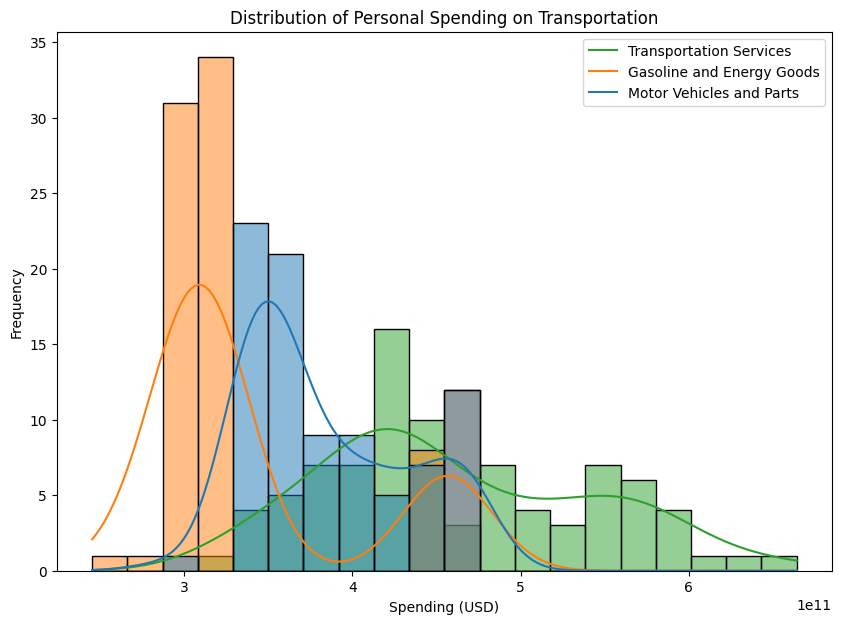

In [10]:
# Histogram of Personal Spendings on Transportation : Examines personal spending on transportation services, motor vehicles and gas so that operators can make informed decisions regarding budgeting and pricing on transportation and adjust prices accprding to individual and customer expenditures
# The histogram bars represent the frequency of the data in each bin (where each bin is a representation of the amount of USD spent on personal expenditures)
# The lines in the graph represent the KDE (kernel density estimation), which is used to predict the probability density function of random variables and allows for a smoother visualization of the data by providing a general shape to follow 
# The taller the bars, the more data points fall within that range
# The following histogram demonstrates that most individuals personally spend their money on gasoline and energy goods, where gasoline and energy goods cost the least amongst the three ways people persoannly spend their money on transportation
# Motor and vehicles parts cost the 2nd most, and transportation services cost the most
# However, there is a wider range in terms of transportation services spending

plt.figure(figsize=(10, 7))
sns.histplot(data=data[['PST-TransServ(SA)',
                        'PST-EnergyGoods(SA)',
                        'PST-AutoServ(SA)']], bins=20, kde=True)
plt.title('Distribution of Personal Spending on Transportation')
plt.xlabel('Spending (USD)')
plt.ylabel('Frequency')
plt.legend(['Transportation Services', 'Gasoline and Energy Goods', 'Motor Vehicles and Parts'])

plt.show()


## 3.1d Plot a Time Series Analysis of Transit Ridership (INCOMPLETE)

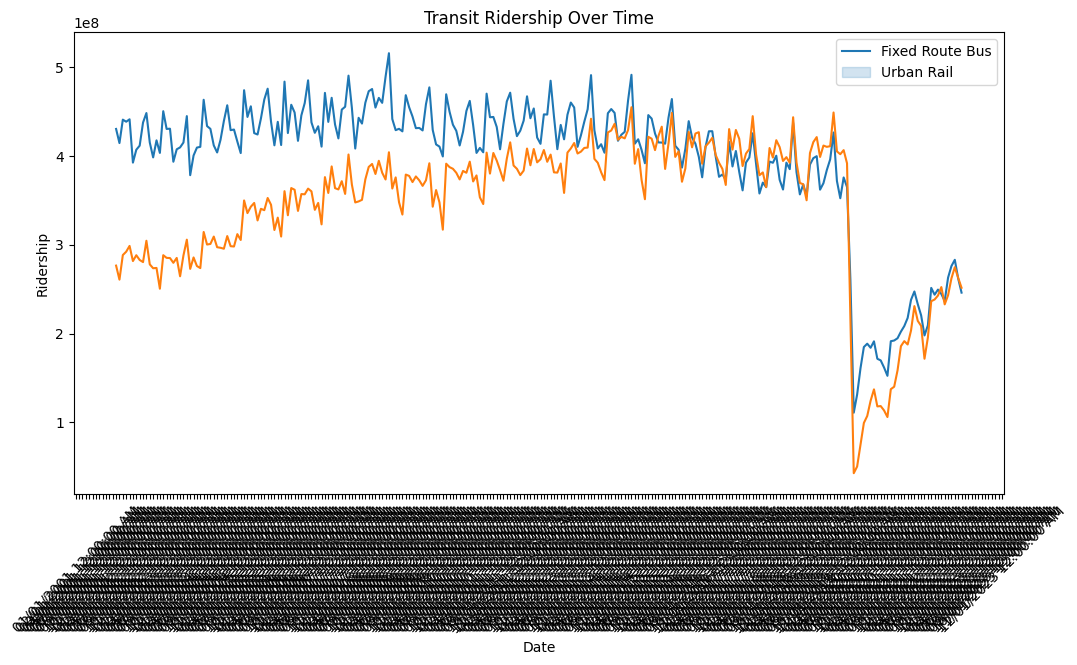

In [11]:
# Plot a Time Series Analysis of Transit Ridership : Plots the trend of transit overtime
# NEED TO FIX GRAPH - CLEAN DATE DATA AND BACK IT UP WITH DESCRIPTIVE STATISTICS!!

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='TRFixedRouteBus(A)', data=data)
sns.lineplot(x='Date', y='TRUrbanRail(A)', data=data)
plt.title('Transit Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.legend(['Fixed Route Bus', 'Urban Rail'])
plt.xticks(rotation=45)

plt.show()

## 3.1e Plot a Heat Map Using heatmap() to Compare GDP with Different Transportation Metrics

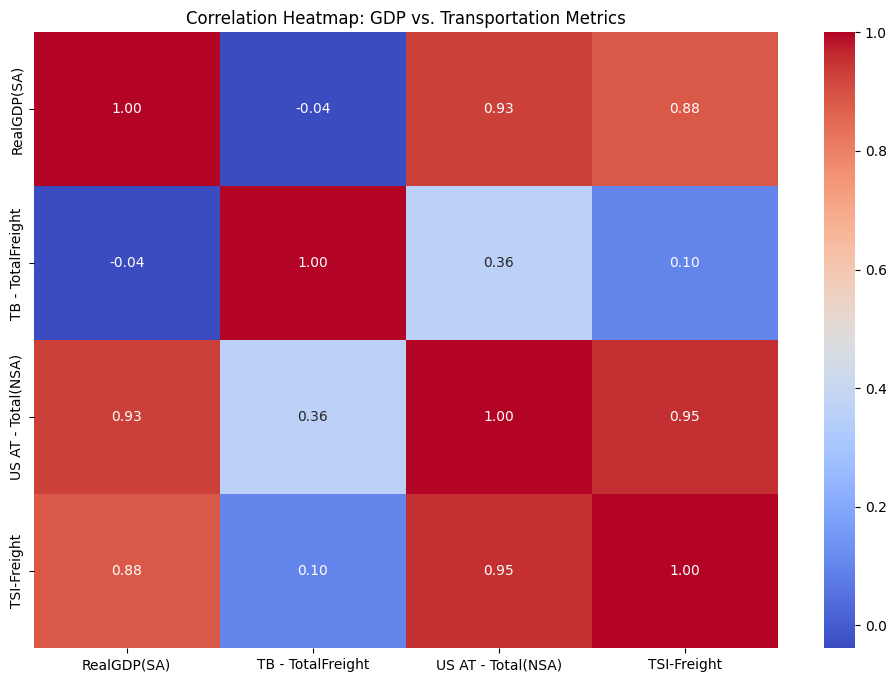

In [12]:
# Heatmap for GDP vs. Transportaraion Metrics : Assists with determining which transporttaion metrics are strongly correlated with the GDP and help operators make adjustmets to transportation service plans
# Darker shades of this heatmap represent stronger correlations, lighter ones represent weaker ones
# The numbers indicate the range, where the correlation coefficient ranges from -1 to 1 (1 = perfect positive correlation, -1 = perfect negative correlation, 0 = no correlation)
# The red diagonal represents the relation each variable has with itself, which is always 1
# Values closer to red/1 represent positive correlations, and that the variables move in the same direction
# Where as, variables closer to -1 and are lighter blues, imply that the variables move in opposite directions

# Clearly, the U.S. Airline Traffic - Total - Non Seasonally Adjusted values and the Real Gross Domestic Product - Seasonally Adjusted values are highly positively correlated as they have a red box with a corelation coefficiant of 0.93.
# Transborder - Total Freight and the Real Gross Product - Seasonally Adjusted has a very weak negative correlation being in a blue box with a correlation coefficiant of -0.04.
# Transportation Service Index - Freight the Real Gross Domestic Product - Seasonally Adjusted are also strongly positively correlated with a correlation of 0.88.

selected_columns = ['RealGDP(SA)',
                   'TB - TotalFreight',
                   'US AT - Total(NSA)',
                   'TSI-Freight']

correlation_matrix = data[selected_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: GDP vs. Transportation Metrics')

plt.show()


## Look for correlations between the features

## 3.2 Check for correlation between attributes using sns.pairplot.

# 4. Prepare the data for Machine Learning Algorithms

## 4.1 Remove duplicate rows.

In [13]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

## 4.2 Handle the missing values

In [14]:
data.isna().sum()

Date                            0
TROtherTransit(A)             672
TRFixedRouteBus(A)            672
TRUrbanRail(A)                672
FRIntermodalUnits             506
FRCarloads                    506
HVMiles(AS)                   874
HFP-RegGas                    577
HFP-HDiesel                   536
PST-TransServ(SA)             837
PST-EnergyGoods(SA)           837
PST-AutoServ(SA)              837
PassRailPass                  617
TSI-Freight                   352
TSI-Pass                      638
RealGDP(SA)                   639
US-CA PC                      606
US-CA TC                      589
US-Mex PC                     589
US-Mex TC                     589
US AT - Domestic(NSA)         857
US AT - Total(NSA)            857
US AT - International(NSA)    857
TB - TotalFreight             721
TB - US-MexFreight            721
TB - US-CAFreight             721
dtype: int64

Here we use the describe() method to see a summary of the numerical attributes. We will also use functions separately to determine individual descriptive statistics so that we are able to determine which attributes are of more significance, and have more meaning. This way we can clean our data more efficiently.

In [15]:
data.describe()

#data.mean()  
#data.median()  
#data.std() 
#data.min()  
#data.max()  
#data.var()  


,TROtherTransit(A),TRFixedRouteBus(A),TRUrbanRail(A),FRIntermodalUnits,FRCarloads,HVMiles(AS),HFP-RegGas,HFP-HDiesel,PST-TransServ(SA),PST-EnergyGoods(SA),...,US-CA PC,US-CA TC,US-Mex PC,US-Mex TC,US AT - Domestic(NSA),US AT - Total(NSA),US AT - International(NSA),TB - TotalFreight,TB - US-MexFreight,TB - US-CAFreight
count,2.520000e+02,2.520000e+02,2.520000e+02,4.180000e+02,4.180000e+02,5.000000e+01,347.000000,388.000000,8.700000e+01,8.700000e+01,...,318.000000,335.000000,3.350000e+02,335.000000,6.700000e+01,6.700000e+01,6.700000e+01,2.030000e+02,2.030000e+02,2.030000e+02
mean,1.479240e+07,3.964658e+08,3.433674e+08,8.854064e+05,1.268048e+06,2.621634e+11,2.502715,2.162191,3.840297e+11,3.421180e+11,...,42729.393082,501483.149254,3.562096e+06,428533.892537,6.247284e+07,7.257015e+06,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
std,3.016048e+06,8.023240e+07,8.191928e+07,2.518891e+05,2.048881e+05,2.519119e+10,1.110270,0.934098,4.783771e+10,6.427849e+10,...,34099.439817,58618.974341,6.105487e+05,90815.299348,2.030572e+07,3.087197e+06,1.736053e+07,1.692174e+10,1.074877e+10,7.156351e+09
min,4.303718e+06,1.110446e+08,4.295134e+07,4.076090e+05,7.397330e+05,1.676170e+11,0.959000,0.921000,2.873200e+11,2.454140e+11,...,555.000000,316002.000000,9.168010e+05,241608.000000,3.010000e+06,1.400000e+05,2.880000e+06,5.426452e+10,2.164871e+10,2.976629e+10
25%,1.264651e+07,3.921185e+08,2.998691e+08,6.801630e+05,1.137315e+06,2.451812e+11,1.420500,1.223250,3.472350e+11,3.024230e+11,...,19602.750000,460903.000000,3.282252e+06,362223.500000,5.822000e+07,5.545000e+06,5.332500e+07,8.034844e+10,3.254186e+10,4.554671e+10
50%,1.520069e+07,4.183203e+08,3.722867e+08,9.025320e+05,1.260416e+06,2.680845e+11,2.519000,2.180000,3.654330e+11,3.167700e+11,...,33469.000000,493212.000000,3.592350e+06,408367.000000,7.034000e+07,8.600000e+06,6.128000e+07,9.227839e+10,4.301536e+10,4.890704e+10
75%,1.700526e+07,4.428878e+08,4.011837e+08,1.065960e+06,1.385619e+06,2.828910e+11,3.238000,2.848250,4.210860e+11,3.250300e+11,...,55661.500000,536325.500000,3.919972e+06,486059.000000,7.464000e+07,9.125000e+06,6.669000e+07,9.995265e+10,4.859893e+10,5.308561e+10
max,2.069144e+07,5.155401e+08,4.547436e+08,1.443854e+06,1.704628e+06,2.964750e+11,5.754000,4.929000,4.724910e+11,4.632940e+11,...,215313.000000,636750.000000,4.999418e+06,672503.000000,8.696000e+07,1.167000e+07,7.528000e+07,1.418502e+11,7.029840e+10,7.334734e+10


## 4.3 Create a pipeline

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
data.drop(labels=['Date'], axis=1, inplace=True)

In [18]:
num_cols = data.select_dtypes(include='number').columns.to_list()
# only contains the date
# cat_cols = data.select_dtypes(exclude='number').columns.to_list()

#create pipelines for numeric columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
# cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols)],
                                    remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['TROtherTransit(A)', 'TRFixedRouteBus(A)',
                                  'TRUrbanRail(A)', 'FRIntermodalUnits',
                                  'FRCarloads', 'HVMiles(AS)', 'HFP-RegGas',
                                  'HFP-HDiesel', 'PST-TransServ(SA)',
                                  'PST-EnergyGoods(SA)', 'PST-AutoServ(SA)',
                                  'PassRailPass', 'TSI-Freight', 'TSI-Pass',
                                  'RealGDP(SA)', 'US-CA PC', 'US-CA TC',
                                  'US-Mex PC', 'US-Mex TC',
                                  'US AT - Domestic(NSA)', 'US AT - Total(NSA)',
                                  'US AT - International(NSA)',
                                  'TB - TotalFreight', 'TB - US-MexFreight',
                                  'TB - US-CAFreight'])])

In [19]:
data_prepared = preprocessing.fit_transform(data)

feature_names=preprocessing.get_feature_names_out()
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)
data_prepared.shape

(924, 25)

# 5. Select a model and train it

In [20]:
from sklearn.model_selection import train_test_split

features = ["num__TROtherTransit(A)", "num__TRFixedRouteBus(A)", "num__TRUrbanRail(A)"]

X = data_prepared.drop(features, axis=1)
y = data_prepared["num__TROtherTransit(A)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(739, 22) (739,) (185, 22) (185,)


Train a Linear Regression model 

In [21]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [22]:
lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

0.19647788848478087

Train a Linear Regression model using KFold cross-validation with 5 folds, and report on the cross validation score, use negative mean squared error as the cross validation metric.

In [23]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-0.18271251, -0.18663752, -0.17623928, -0.27156503, -0.14887381])

In [24]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')

Cross-Validation Mean Score: 0.19320562785549317


Train a Linear Regression model using Ridge and Lasso regularization with alpha=1

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)


LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)

In [26]:
Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
ridge_mse = mse(y_test, Ridge_y_predict)
lasso_mse=mse(y_test, Lasso_y_predict)

print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Ridge Regression MSE: 0.19227980887734436
Lasso Regression MSE: 0.9340531451570716


In [27]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Cross-Validation Mean Score: {mean_score}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Linear Regression MSE: 0.19647788848478087
Cross-Validation Mean Score: 0.19320562785549317
Ridge Regression MSE: 0.19227980887734436
Lasso Regression MSE: 0.9340531451570716


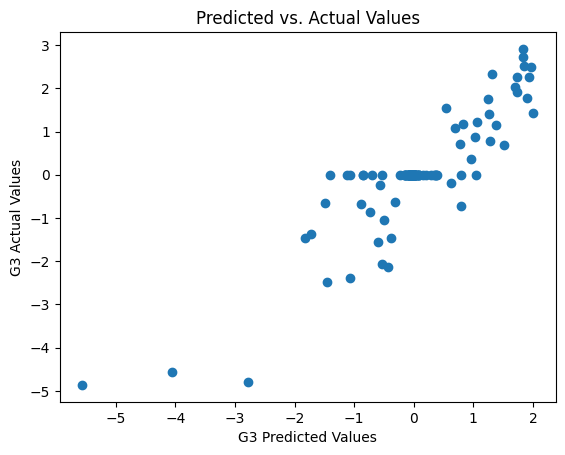

In [28]:
import matplotlib.pyplot as plt

# Assuming 'lr_model' is your best performing trained linear regression model
lr_y_predict = lr_model.predict(X_test)  # X is your feature data
plt.scatter(lr_y_predict, y_test)  # y is your actual target values
plt.xlabel("G3 Predicted Values")
plt.ylabel("G3 Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()